In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [18]:
df = pd.read_csv("spotify.csv")

In [19]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [20]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [22]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [23]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [24]:
# Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
              Artist                                         Track Name  \
39      Travis Scott                             MELTDOWN (feat. Drake)   
52      Travis Scott                   TELEKINESIS (feat. SZA & Future)   
72         21 Savage                                            née-nah   
73             Drake                      Jimmy Cooks (feat. 21 Savage)   
76             Drake                                          Rich Flex   
131            Drake               First Person Shooter (feat. J. Cole)   
170     Metro Boomin            Trance (with Travis Scott & Young Thug)   
182   D-Block Europe                                           Overseas   
210      Post Malone      Sunflower - Spider-Man: Into the Spider-Verse   
212     Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
222          Cardi B                    WAP (feat. Megan Thee Stallion)   
224          Cardi B                 Bongos (feat. Megan Thee Stallion)   
242      

In [25]:
df_cleaned = df.drop_duplicates()
df_cleaned.to_csv('cleaned_file.csv', index=False)

In [26]:
df = pd.read_csv("cleaned_file.csv")

In [27]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
408,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
409,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
410,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
411,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


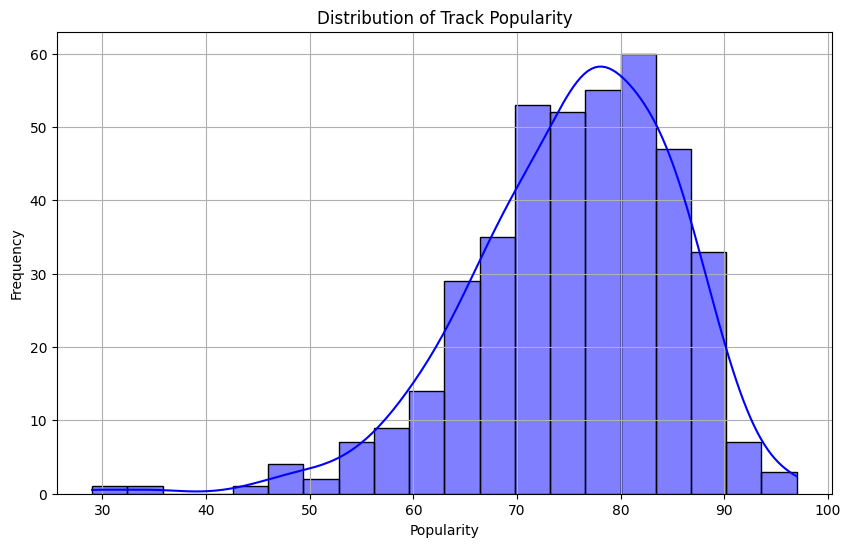

In [29]:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.grid(True)
plt.show()

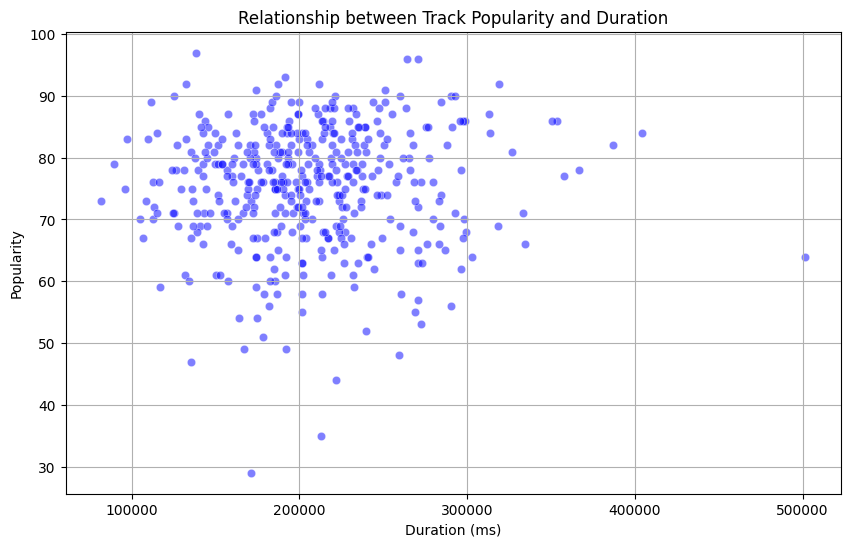

In [31]:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.5, color='blue')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Relationship between Track Popularity and Duration')
plt.grid(True)
plt.show()

The artist with the highest number of tracks is: Drake


<ipython-input-32-cabec4a691e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df, order=artist_counts.index, palette='viridis')


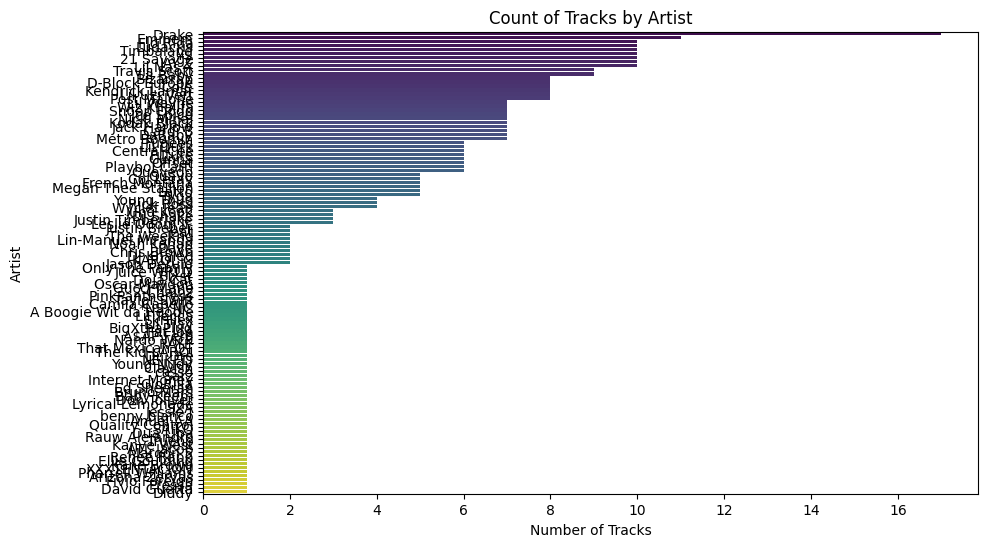

In [32]:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
artist_counts = df['Artist'].value_counts()
top_artist = artist_counts.idxmax()
print(f"The artist with the highest number of tracks is: {top_artist}")
plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df, order=artist_counts.index, palette='viridis')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Count of Tracks by Artist')
plt.show()

In [33]:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df.nsmallest(5, 'Popularity')
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
199          Pressa  Attachments (feat. Coi Leray)          29
219   Justin Bieber                     Intentions          35
390  French Montana                Splash Brothers          44
213        Lil Baby                  On Me - Remix          47
384     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [35]:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top_artists_avg_popularity = df.groupby('Artist')['Popularity'].mean()
top_5_artists = top_artists_avg_popularity.nlargest(5)
print(top_5_artists)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [37]:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_artists_avg_popularity = df.groupby('Artist')['Popularity'].mean()
top_5_artists = top_artists_avg_popularity.nlargest(5).index
top_tracks = {}
for artist in top_5_artists:
    most_popular_track = df[df['Artist'] == artist].nlargest(1, 'Popularity')['Track Name'].values[0]
    top_tracks[artist] = most_popular_track
print(top_tracks)

{'cassö': 'Prada', 'Trueno': 'Mamichula - con Nicki Nicole', 'David Guetta': "Baby Don't Hurt Me", 'Travis Scott': 'FE!N (feat. Playboi Carti)', '¥$': 'CARNIVAL'}


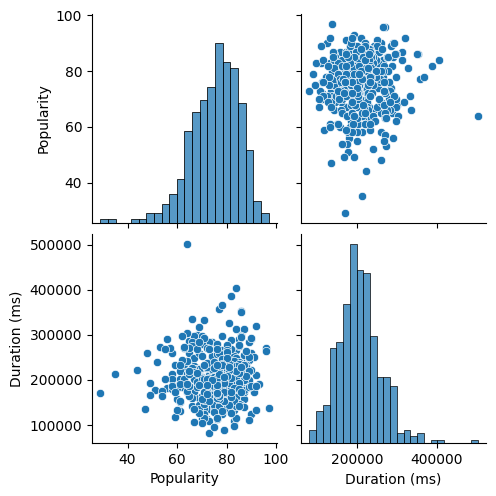

In [39]:
# Visualize relationships between multiple numerical variables simultaneously using a pair plot
numerical_columns = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_columns])
plt.show()

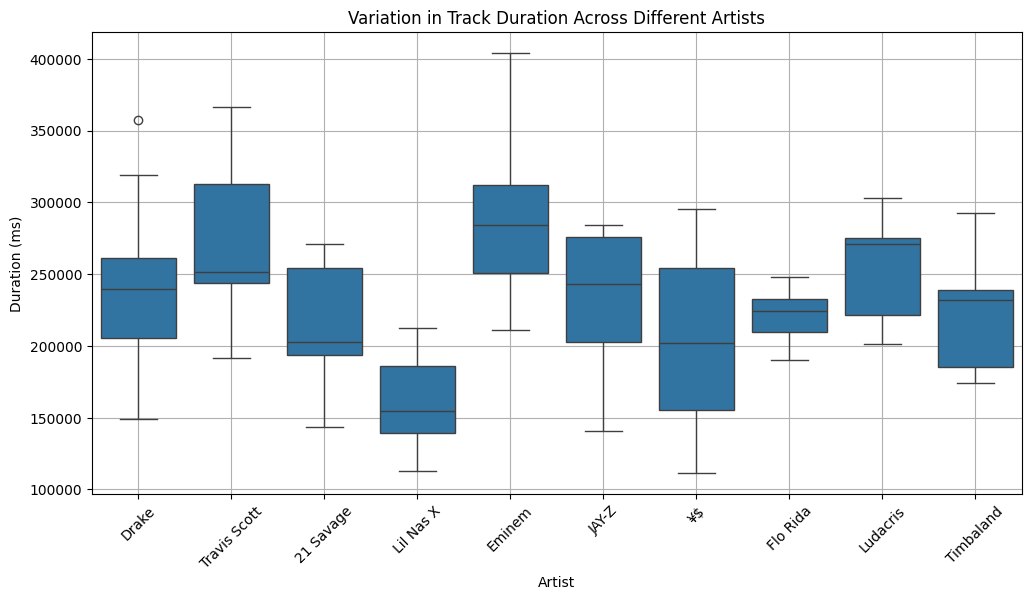

In [40]:
# Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
top_artists = df['Artist'].value_counts().nlargest(10).index
filtered_df = df[df['Artist'].isin(top_artists)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=filtered_df)
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Variation in Track Duration Across Different Artists')
plt.grid(True)
plt.show()

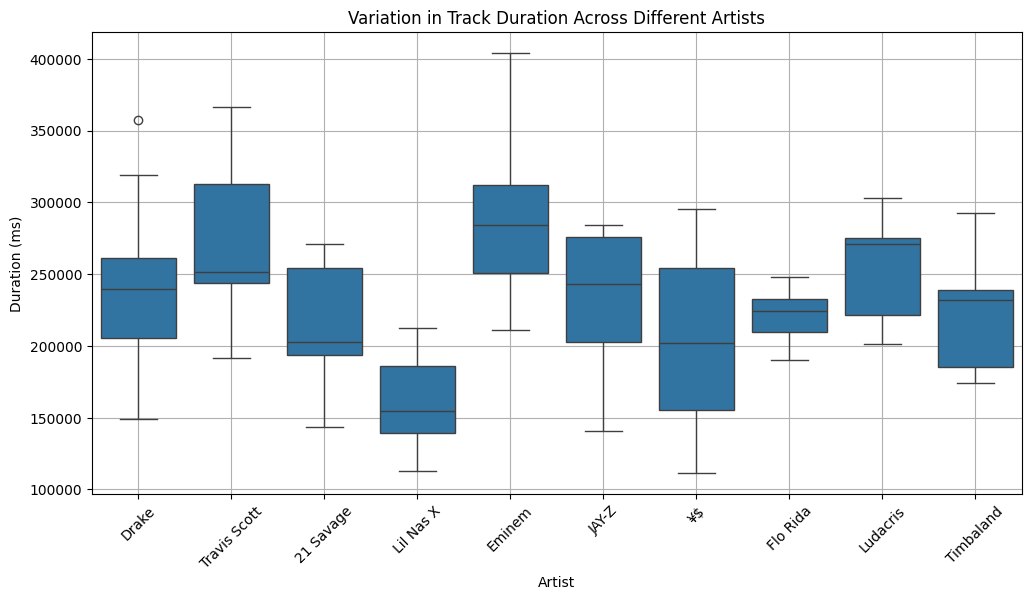

In [42]:
#  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or aviolin plot.
top_artists = df['Artist'].value_counts().nlargest(10).index
filtered_df = df[df['Artist'].isin(top_artists)]
# Create a box plot to visualize track duration variation across artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=filtered_df)
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Variation in Track Duration Across Different Artists')
plt.grid(True)
plt.show()

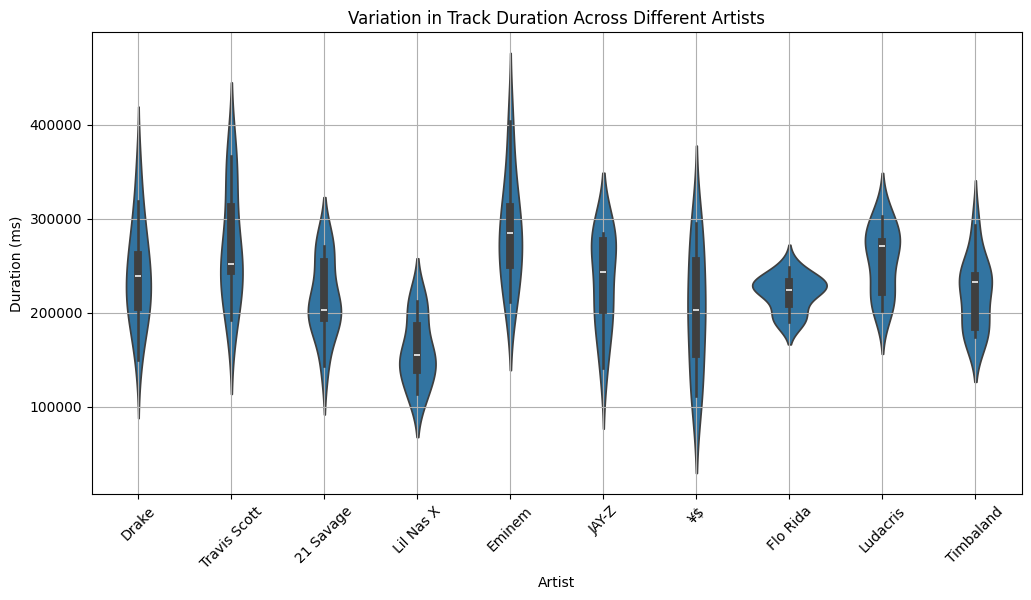

In [43]:
# violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=filtered_df)
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Variation in Track Duration Across Different Artists')
plt.grid(True)
plt.show()